<a href="https://colab.research.google.com/github/dikoharyadhanto/Project_Tes_RuangGuru/blob/main/Kerjaan_RuangGuru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pendahuluan**

Berikut ini adalah dummy data tracking forum siswa dan tutor untuk saling bertanya dan membantu mengerjakan tugas/PR/soal yang sulit. Setiap 1 row mewakili 1 pertanyaan yang diajukan. Targetnya adalah setiap pertanyaan dapat dijawab sesuai dengan SLA dari setiap paket. Paket reguler dalam 48 jam, dan paket premium-elite dalam 24 jam.

- Insight apa saja yang kamu temukan?
- Apakah ada hari tertentu yang sebaiknya kita menambah jumlah teacher yang bertugas?
- Mata pelajaran apa yang perlu segera ditindaklanjuti?
- Pada jam berapa saja sebaiknya teacher banyak bertugas?
- Rata-rata, berapa postingan yang dibuat per siswa tiap minggunya?

# **Data Profiling**

## **Import File & Required Libraries**

Pertama-tama, import libraries yang diperlukan dan upload serta import file csv yang digunakan

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
#Read CSV file
df = pd.read_csv('Educontent Data Associate - Case Study (1).csv')
df.head()

,Question ID,Question Created At,Subject,Class,Email,PackageType,Created vs answered hour diff
0,AAAAA164WUTS,"28 Jul 2021, 09:58:07",Matematika,IPA,xxxxtodwi55@gmail.com,REGULAR,21
1,AAAAA21IWPA3,"23 Jul 2021, 14:29:05",Biologi,10 SMA IPA,xxxxazulfa01@gmail.com,REGULAR,1
2,AAAAA2FF34FV,"21 Jul 2021, 21:32:59",Fisika,IPA,xxxxfaniesilalahi@gmail.com,PREMIUM,2
3,AAAAA2PUVPKG,"23 Jul 2021, 08:35:30",Matematika,4 SD,xxxxaummumaryam@gmail.com,REGULAR,25
4,AAAAA325W02N,"21 Jul 2021, 16:15:02",Bahasa Indonesia,5 SD,xxxxyputra955@gmail.com,PREMIUM,3


## **Jumlah Kolom, Baris & Tipe Data**

File CSV terdiri atas 6 kolom dan 3285 baris. Terdapat 1 data bertipe `int` dan 5 data bertipe `object`. Terdapat ketidaksesuaian tipe data sehingga perlu dilakukan konversi data terlebih dahulu.
- Kolom `Question Created At` harus dikonversi menjadi `datetime`
- Kolom `Subject`, `Class`, dan `PackageType` sebaiknya perlu dikonversi menjadi `category`



In [5]:
#Checking table info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Question ID                    3285 non-null   object
 1   Question Created At            3285 non-null   object
 2   Subject                        3285 non-null   object
 3   Class                          3272 non-null   object
 4   Email                          3285 non-null   object
 5   PackageType                    3285 non-null   object
 6   Created vs answered hour diff  3285 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 179.8+ KB


In [6]:
#Checking df shape(Rows, Columns)
df.shape

(3285, 7)

## **Kategori Data**

Selanjutnya, saya akan mengecek ada kategori apa saja yang dimiliki masing-masing kolom `Subject`, `Class`, dan `PackageType`
- Berdasarkan tipe paket langganan yang digunakan, member terbagi menjadi 3 tipe paket langganan; member **Regular**, member **Premium**, dan member **Elite**. Masing-masing paket memiliki fitur-fitur yang berbeda yang ditawarkan, salah satunya mengenai batas waktu respons pertanyaan oleh *teacher*
- Masing-masing member akan dikelompokkan berdasarkan kelasnya, dari mulai kelas 3 SD hingga kelas 12 SMA (IPA/IPS). Demikian juga dengan pertanyaan-pertanyaan yang diajukan akan dikelompokkan berdasarkan kelas member
- Masing-masing pertanyaan selanjutnya juga akan dikelompokkan berdasarkan mata pelajarannya. Terdapat 12 mata pelajaran yang terdiri atas 3 pelajaran dasar (Matematika, Bahasa Indonesia, Bahasa Inggris), 4 pelajaran IPA (Biologi, Fisika, Kimia, IPA Terpadu), dan 5 pelajaran IPS (Sosiologi, Sejarah, Geografi, Ekonomi, IPS Terpadu)

In [7]:
#Checking Subject, Class, PackageType Column Category
print('Kategori Subject:\n', list(df['Subject'].unique())) #Subject Category
print('\nKategori Class:\n', list(df['Class'].unique())) #Class Category
print('\nKategori Package Type:\n', list(df['PackageType'].unique())) #PackageType Category

Kategori Subject:
 ['Matematika', 'Biologi', 'Fisika', 'Bahasa Indonesia', 'Kimia', 'Bahasa Inggris', 'IPA Terpadu', 'Sosiologi', 'Sejarah', 'Geografi', 'Ekonomi', 'IPS Terpadu']

Kategori Class:
 ['IPA', '10 SMA IPA', '4 SD', '5 SD', '11 SMA IPA', '6 SD', 'IPS', '8 SMP', nan, '9 SMP', '10 SMA IPS', '11 SMA IPS', '7 SMP', '12 SMA IPS', '12 SMA IPA', '3 SD']

Kategori Package Type:
 ['REGULAR', 'PREMIUM', 'ELITE']


# **Data Cleansing**

## **Mengecek dan Mengatasi Missing Values**

Pertama, saya mengecek apakah terdapat missing values. Kolom `Class` memiliki missing values sebanyak 13 data.

In [8]:
#Checking Missing Values
for col in df.columns.tolist():          
  print('{} column missing values: {}'.format(col, df[col].isnull().sum()))

Question ID column missing values: 0
Question Created At column missing values: 0
Subject column missing values: 0
Class column missing values: 13
Email column missing values: 0
PackageType column missing values: 0
Created vs answered hour diff column missing values: 0


Menampilkan tabel dengan kolom `CLass` yang datanya merupakan missing values

In [9]:
#Showing Tables with null
df[df['Class'].isnull()]

,Question ID,Question Created At,Subject,Class,Email,PackageType,Created vs answered hour diff
14,AAAAA7J9M0VZ,"27 Jul 2021, 07:48:34",Bahasa Inggris,NaN,xxxxyblank50@gmail.com,REGULAR,6
404,AAAAADUFMJ2T,"27 Jul 2021, 15:08:39",Kimia,NaN,xxxx.maytasari94@gmail.com,REGULAR,2
908,AAAAAE59V5C2,"27 Jul 2021, 15:07:54",Kimia,NaN,xxxx.maytasari94@gmail.com,REGULAR,2
1046,AAAAA0WVVUZX,"31 Jul 2021, 20:10:13",Biologi,NaN,xxxx.maytasari94@gmail.com,REGULAR,2
1073,AAAAAB2JNO2U,"29 Jul 2021, 08:37:33",Matematika,NaN,xxxxrtiaracitraaa@gmail.com,REGULAR,61
1379,AAAAALH3PT5O,"29 Jul 2021, 19:02:33",Sejarah,NaN,xxxx.maytasari94@gmail.com,REGULAR,27
1406,AAAAAXS2DWUE,"29 Jul 2021, 09:32:14",Sejarah,NaN,xxxx.maytasari94@gmail.com,REGULAR,33
1776,AAAAAZO42UU5,"20 Jul 2021, 23:52:59",Fisika,NaN,xxxxiparamanda@gmail.com,PREMIUM,11
2197,AAAAAYJZGC9D,"29 Jul 2021, 19:01:13",Sejarah,NaN,xxxx.maytasari94@gmail.com,REGULAR,27
2301,AAAAA75PPGRH,"22 Jul 2021, 10:16:26",Biologi,NaN,xxxx.maytasari94@gmail.com,REGULAR,25


Setelah mengecek apakah terdapat missing values, saya mengubah nilai missing values tersebut dengan nilai sebenarnya. Pada kolom `Class`, saya mengganti nilai yang kosong dengan kata `'Umum'` untuk menjelaskan bahwa pertanyaan-pertanyaan tertentu yang tidak dikategorikan pada kelas manapun, akan dikategorikan sebagai pertanyaan umum.

In [10]:
#Treatment missing values with .fillna() function
df['Class'] = df['Class'].fillna('Umum')

In [11]:
#Rechecking missing values
for col in df.columns.tolist():          
  print('{} column missing values: {}'.format(col, df[col].isnull().sum()))

Question ID column missing values: 0
Question Created At column missing values: 0
Subject column missing values: 0
Class column missing values: 0
Email column missing values: 0
PackageType column missing values: 0
Created vs answered hour diff column missing values: 0


## **Konversi Tipe Data**

Tahap selanjutnya dalam proses data cleansing adalah melakukan konversi tipe data yang tidak sesuai. 
- Kolom `Question Created At` harus dikonversi menjadi `datetime`
- Kolom `Subject`, `Class`, dan `PackageType` sebaiknya perlu dikonversi menjadi `category`

In [12]:
#Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Question ID                    3285 non-null   object
 1   Question Created At            3285 non-null   object
 2   Subject                        3285 non-null   object
 3   Class                          3285 non-null   object
 4   Email                          3285 non-null   object
 5   PackageType                    3285 non-null   object
 6   Created vs answered hour diff  3285 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 179.8+ KB


In [13]:
#object to datetime in 'Question Created At' column
df['Question Created At'] = pd.to_datetime(df['Question Created At'])

#object to category in cols list
cols = ['Subject', 'Class', 'PackageType']
for col in cols:
  df[col] = df[col].astype('category')

In [14]:
#Rechecking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Question ID                    3285 non-null   object        
 1   Question Created At            3285 non-null   datetime64[ns]
 2   Subject                        3285 non-null   category      
 3   Class                          3285 non-null   category      
 4   Email                          3285 non-null   object        
 5   PackageType                    3285 non-null   category      
 6   Created vs answered hour diff  3285 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(1), object(2)
memory usage: 113.7+ KB


## **Mengecek Outlier**

Selanjutnya adalah mengecek apakah ada data-data outlier atau tidak. Kolom yang akan digunakan adalah kolom `'Created vs answered hour diff'`. Berikut merupakan distribusi data pada kolom `'Created vs answered hour diff'`. Menunjukkan bahwa nilai tengahnya adalah 10 jam, sedangkan nilai maksimumnya adalah 246 jam atau sekitar 10 hari. Sedangkan nilai minimumnya kurang dari 1 jam.

In [15]:
#Distribution of data before Outliers are handled
print('\nDistribution of data before Outliers are handled: ')
print(df['Created vs answered hour diff'].describe())


Distribution of data before Outliers are handled: 
count    3285.000000
mean       18.624658
std        21.635068
min         0.000000
25%         1.000000
50%        10.000000
75%        29.000000
max       246.000000
Name: Created vs answered hour diff, dtype: float64


Pada grafik Boxplot dibawah, ternyata terdapat cukup banyak data-data yang merupakan outlier. Secara keseluruhan, cukup sulit untuk menemukan berapa nilai rata-rata secara keseluruhan karen Standar Deviasi yang terlampau besar. Namun, pada kasus ini, kurang bijak jika kita melakukan treatment pada data-data outlier yang jumlahnya cukup banyak dan saya akan membiarkan data-data outlier tersebut apa adanya sebagai dasar analisis saya untuk menilai performa kecepatan menjawab tiap pertanyaan.

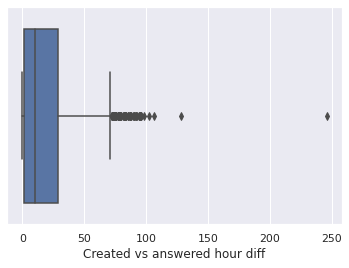

In [16]:
# Creating Box Plot
plt.figure() # to create new figure
sns.boxplot(x=df['Created vs answered hour diff'])
plt.show()

Pada informasi quantile berikut, diketahui nilai tengahnya adalah 10 jam, quantile ketiga adalah 29 jam dan quantil pertama adalah 1 jam. Pada tahap EDA (Exploratory Data Analysis), saya akan menggunakan batas quantile dibawah untuk mengelompokkan tiap-tiap pertanyaan kedalam kategori kecepatan dalam menjawab yang akan dijelaskan lebih detail pada bagian Exploratory Data Analysis.

In [17]:
print(df['Created vs answered hour diff'].quantile([.1, .25, .5, .75]))
Q1 = df['Created vs answered hour diff'].quantile(.25)
Q2 = df['Created vs answered hour diff'].quantile(.5)
Q3 = df['Created vs answered hour diff'].quantile(.75)
IQR = Q3 - Q1
min_IQR = Q1 - (1.5 * IQR)
max_IQR = Q3 + (1.5 * IQR)
print('Nilai Batas Minimal:', min_IQR)
print('Nilai Batas Maksimal:', max_IQR)

0.10     0.0
0.25     1.0
0.50    10.0
0.75    29.0
Name: Created vs answered hour diff, dtype: float64
Nilai Batas Minimal: -41.0
Nilai Batas Maksimal: 71.0


# **Feature Engineering**

Feature Engineering merupakan teknik untuk membuat fitur/kolom baru dari fitur/kolom yang sudah ada. Ada beberapa kolom yang perlu dibuat sebagai dasar analisis saya. 
- Kolom **`'Day of Week'`** : kolom yang menunjukkan hari apa pada tanggal pertanyaan tersebut dibuat sesuai dengan kolom `'Question Created At'`
- Kolom **`Week Number`** : Kolom yang menunjukkan minggu ke berapa pertanyaan tersebut dibuat
- Kolom **`Status`** : menunjukkan keterangan apakah pertanyaan terkait direspon oleh *teacher* sesuai batas waktu atau tidak. Untuk Paket Regular, batas waktu respon pertanyaan maksimal 48 jam atau 2 hari, sedangkan untuk Paket Elite dan Premium, batas waktunya maksimal 24 jam
- Kolom **`'Question Answered At'`**, merupakan jumlah antara kolom `'Question Created At'` dengan kolom `'Created vs answered hour diff'`. Menunjukkan `datetime` yang menjelaskan kapan tanggal dan waktu pertanyaan terkait dijawab atau direspon oleh *teacher*
- Kolom **`Respond Rate`**, menjelaskan tingkat kecepatan teacher dalam merespon pertanyaan. Kategorinya antara lain **Sangat Cepat** (Kurang dari 1 jam), **Cepat** (1 - 10 jam), **Sedang** (10 - 24 jam), **Lambat** (24 - 71 jam), **Sangat Lambat** (Lebih dari 71 jam)


In [18]:
#create 'Day of Week' column
df['Day Of Week'] = df['Question Created At'].dt.day_name() #'Day Of Week' column
DayOfWeek_Cat = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Of Week'] = pd.Categorical(df['Day Of Week'], categories=DayOfWeek_Cat, ordered=True)

#create 'Week Number' column
df['Week Number'] = df['Question Created At'].dt.week

#create 'Question Answered At' column
df_time_diff = pd.to_timedelta(df['Created vs answered hour diff'], unit = 'h')
df['Question Answered At'] = df['Question Created At'] + df_time_diff #'Question Answered At' column

#create 'Status' column
#Untuk Paket REGULAR
c1 = df['PackageType'].eq('REGULAR') #condition1
c2 = df['Created vs answered hour diff'].between(0,48) #condition2
#Untuk Paket PREMIUM dan ELITE
c3 = df['PackageType'].eq('PREMIUM', 'ELITE') #condition3
c4 = df['Created vs answered hour diff'].between(0,24) #condition4
df['Status']=np.where(c1&c2 | c3&c4, 'Sesuai Batas Waktu', 'Lewat Batas Waktu') #'Status' column

#create 'Respond Rate' column
#membuat fungsi
def respond_rate(row):
  if row['Created vs answered hour diff'] <= Q1:
    val = 'Sangat Cepat'
  elif row['Created vs answered hour diff'] > Q1 and row['Created vs answered hour diff'] <= Q2:
    val = 'Cepat'
  elif row['Created vs answered hour diff'] > Q2 and row['Created vs answered hour diff'] <= 24:
    val = 'Sedang'
  elif row['Created vs answered hour diff'] > 24 and row['Created vs answered hour diff'] <= max_IQR:
    val = 'Lambat'    
  else:
    val = 'Sangat Lambat'
  return val
df['Respond Rate'] = df.apply(respond_rate, axis=1)

#showing table
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,Question ID,Question Created At,Subject,Class,Email,PackageType,Created vs answered hour diff,Day Of Week,Week Number,Question Answered At,Status,Respond Rate
0,AAAAA164WUTS,2021-07-28 09:58:07,Matematika,IPA,xxxxtodwi55@gmail.com,REGULAR,21,Wednesday,30,2021-07-29 06:58:07,Sesuai Batas Waktu,Sedang
1,AAAAA21IWPA3,2021-07-23 14:29:05,Biologi,10 SMA IPA,xxxxazulfa01@gmail.com,REGULAR,1,Friday,29,2021-07-23 15:29:05,Sesuai Batas Waktu,Sangat Cepat
2,AAAAA2FF34FV,2021-07-21 21:32:59,Fisika,IPA,xxxxfaniesilalahi@gmail.com,PREMIUM,2,Wednesday,29,2021-07-21 23:32:59,Sesuai Batas Waktu,Cepat
3,AAAAA2PUVPKG,2021-07-23 08:35:30,Matematika,4 SD,xxxxaummumaryam@gmail.com,REGULAR,25,Friday,29,2021-07-24 09:35:30,Sesuai Batas Waktu,Lambat
4,AAAAA325W02N,2021-07-21 16:15:02,Bahasa Indonesia,5 SD,xxxxyputra955@gmail.com,PREMIUM,3,Wednesday,29,2021-07-21 19:15:02,Sesuai Batas Waktu,Cepat


## **Memperbaiki Kesalahan Input Data**

Pada kolom `Class`, saya mengubah data-data dengan kelas 'IPA' menjadi '12 SMA IPA' dan kelas 'IPS' menjadi '12 SMA IPS'. Hal demikian saya lakukan dengan asumsi karena terjadi kesalahan data. Argumen dasar saya melakukan itu adalah karena ketika divisualisasikan dalam bentuk grafik batang, sangat aneh jika kelas 12 SMA IPA ataupun 12 SMA IPS memiliki jumlah pertanyaan yang sangat amat sedikit. 

In [19]:
df['Class'] = df['Class'].replace(to_replace ="IPA", value ="12 SMA IPA")
df['Class'] = df['Class'].replace(to_replace ="IPS", value ="12 SMA IPS")

# **Exploratory Data Analysis**

## **Berapa Jumlah member yang aktif dalam forum?**

Berdasarkan informasi dibawah, saya mendapatkan informasi bahwa data yang direkap mulai dari tanggal 19 Juli 2021 hingga 2 Agustus 2021 dengan jumlah pertanyaan sebanyak 3285 dengan jumlah member yang aktif dalam forum dalam periode sekian sebanyak 1246.

In [20]:
print(df['Question Created At'].describe())
print('\nJumlah member yang aktif bertanya dalam forum = ', len(df['Email'].unique()), '\n')

count                    3285
unique                   3270
top       2021-07-19 19:39:24
freq                        2
first     2021-07-19 02:29:03
last      2021-08-02 09:11:14
Name: Question Created At, dtype: object

Jumlah member yang aktif bertanya dalam forum =  1246 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


## **Berapa persentase jumlah pertanyaan Berdasarkan Statusnya?**

Grafik pie chart dibawah menunjukkan berapa persentase pertanyaan yang berstatus 'Sesuai Batas Waktu' dan 'Lewat Batas Waktu'. Dari grafik, ternyata dari total 3285 pertanyaan, sebesar 79.5% diantaranya berstatus 'Sesuai Batas Waktu' sedangkan ada 20.5% pertanyaan yang direspons melewati batas waktu yang ditentukan.

Jumlah pertanyaan berdasarkan status:
 Sesuai Batas Waktu    2612
Lewat Batas Waktu      673
Name: Status, dtype: int64 



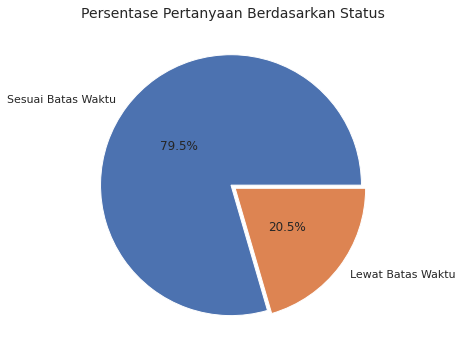

In [21]:
data = df['Status'].value_counts()
print('Jumlah pertanyaan berdasarkan status:\n', data, '\n')

#Create pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Persentase Pertanyaan Berdasarkan Status", fontsize=14);
pie.savefig("Persentase Pertanyaan Berdasarkan Status.png")

In [22]:
#membuat fungsi plot grafik based on status
def plot_grafik_batang(x,hue, data):
  fig, axs = plt.subplots(figsize=(22, 9))
  sns.countplot(x=x, hue=hue, data=data)
  
  plt.xlabel(x, size=15, labelpad=20)
  plt.ylabel('Question Count', size=15, labelpad=20)
  plt.tick_params(axis='x', labelsize=10)
  plt.tick_params(axis='y', labelsize=15)
  
  plt.legend(['Sesuai Batas Waktu', 'Lewat Batas Waktu'], loc='upper left', prop={'size': 15})
  plt.title('Jumlah Pertanyaan Berdasarkan {} dan {}'.format(x, hue), size=15, y=1.05)
  plt.savefig("Jumlah Pertanyaan Berdasarkan {} dan {}.png".format(x, hue))
  
  plt.show()

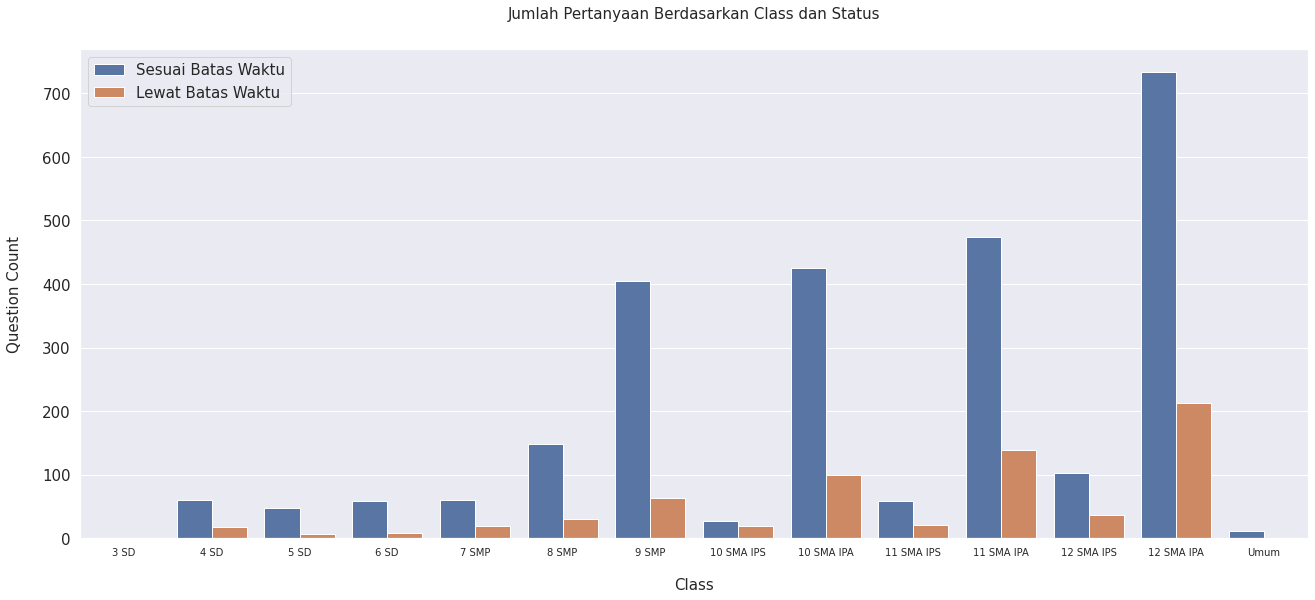

In [23]:
#Mengurutkan Data Sesuai Urutan Kelas
Class_Cat = ['3 SD', '4 SD', '5 SD', '6 SD',
             '7 SMP', '8 SMP', '9 SMP',
             '10 SMA IPS', '10 SMA IPA',
             '11 SMA IPS', '11 SMA IPA',
             '12 SMA IPS', '12 SMA IPA',
             'Umum']
df['Class'] = pd.Categorical(df['Class'], categories=Class_Cat, ordered=True)

#Create Bar Chart
plot_grafik_batang('Class','Status',df)

## **Apakah Pilihan Paket Member mempengaruhi Lamanya Pertanyaan untuk Dijawab?**

Kalau dianalisis lebih detail lagi berdasarkan `PackageType`, ternyata member paling banyak memilih paket Regular dibandingkan paket lainnya. Hal menarik lainnya adalah ternyata pertanyaan-pertanyaan dari member dengan Paket Premium relatif lebih banyak berstatus 'Lewat Batas Waktu' dan semua pertanyaan dari member paket Elite berstatus 'Lewat Batas Waktu' meskipun member yang memilih tipe paket ini relatif paling sedikit yang tidak sampai 100 member. Hal tersebut mungkin dapat terjadi karena selain paket Regular, batas waktu yang ditentukan lebih singkat. Dugaan saya teacher **tidak memprioritaskan pertanyaan member dengan tipe paket Elite ataupun Premium terlebih dahulu untuk dijawab pada waktu tertentu.**

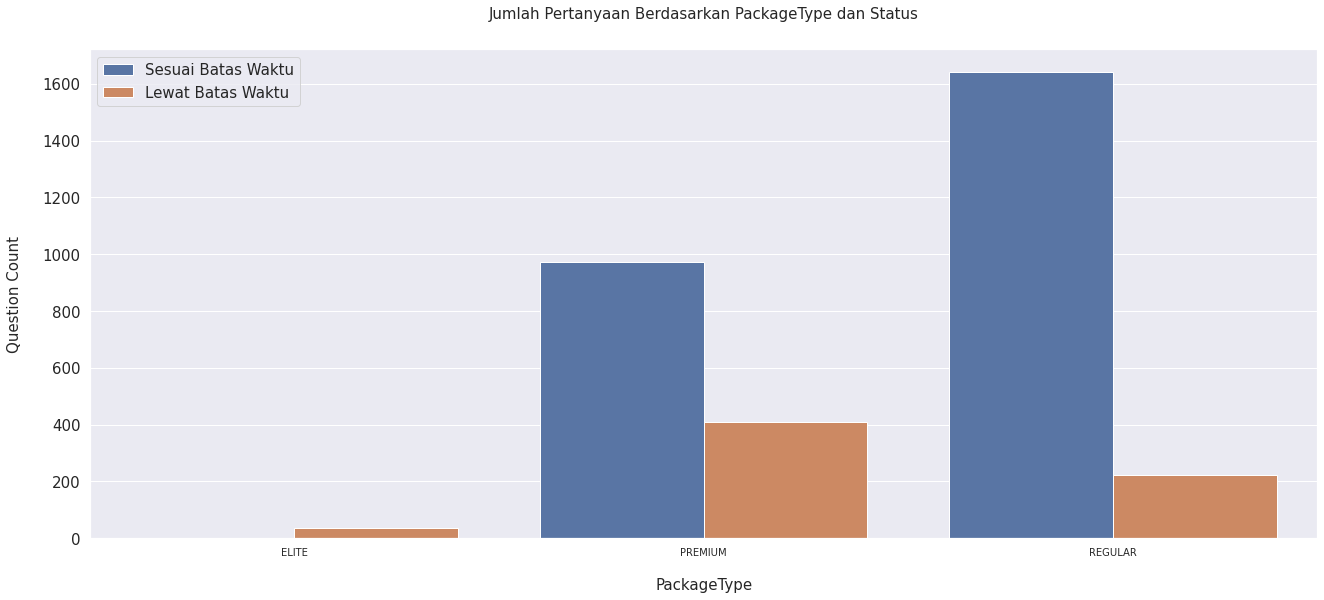

In [24]:
plot_grafik_batang('PackageType','Status',df)

Dengan menggunakan korelasi, saya mencoba untuk menjelaskan apakah ada keterkaitan antara paket yang digunakan member dengan lamanya waktu pertanyaan untuk direspon. Hasilnya ternyata memang keduanya saling tidak berkaitan. **Pilihan paket member tidak mempengaruhi lamanya waktu pertanyaan untuk direspon.**

In [25]:
corr_data = df[['PackageType','Created vs answered hour diff']]

PackageType_map = {'REGULAR': 1, 'PREMIUM' : 2, 'ELITE' : 2}
corr_data['PackageType'] = corr_data['PackageType'].map(PackageType_map)

corr_data.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PackageType,Created vs answered hour diff
PackageType,1.000000,-0.070831
Created vs answered hour diff,-0.070831,1.000000


## **Mata Pelajaran apa saja yang perlu ditindaklanjuti**

Apabila kita bandingkan dengan `Subject`, ternyata pertanyaan-pertanyaan yang diajukan relatif jauh lebih banyak ditanyakan untuk mata pelajaran Matematika, yang kedua merupakan Fisika. Sekitar 80% pertanyaan yang berstatus 'Lewat Batas Waktu' menanyakan tentang Matematika dan mereka tidak direspon dengan cukup cepat oleh teacher. Hal tersebut dapat disebabkan salah satunya sangat banyaknya jumlah pertanyaan yang diajukan member, dan juga faktor-faktor pendukung lainnya, seperti lama pengerjaan untuk setiap pertanyaan, pemahaman soal-soal dan materi dll. Selain itu juga, Fisika, yang juga menjadi mata pelajaran dengan pertanyaan terbanyak kedua, merupakan salah satu mata pelajaran yang perlu ditinjau lebih lanjut karena relatif cukup banyaknya pertanyaan yang direspon lambat oleh teacher. Dengan demikian, RuangGuru perlu meninjau pertanyaan-pertanyaan dari mata pelajaran **Matematika** dan **Fisika** untuk ditindaklanjuti. 

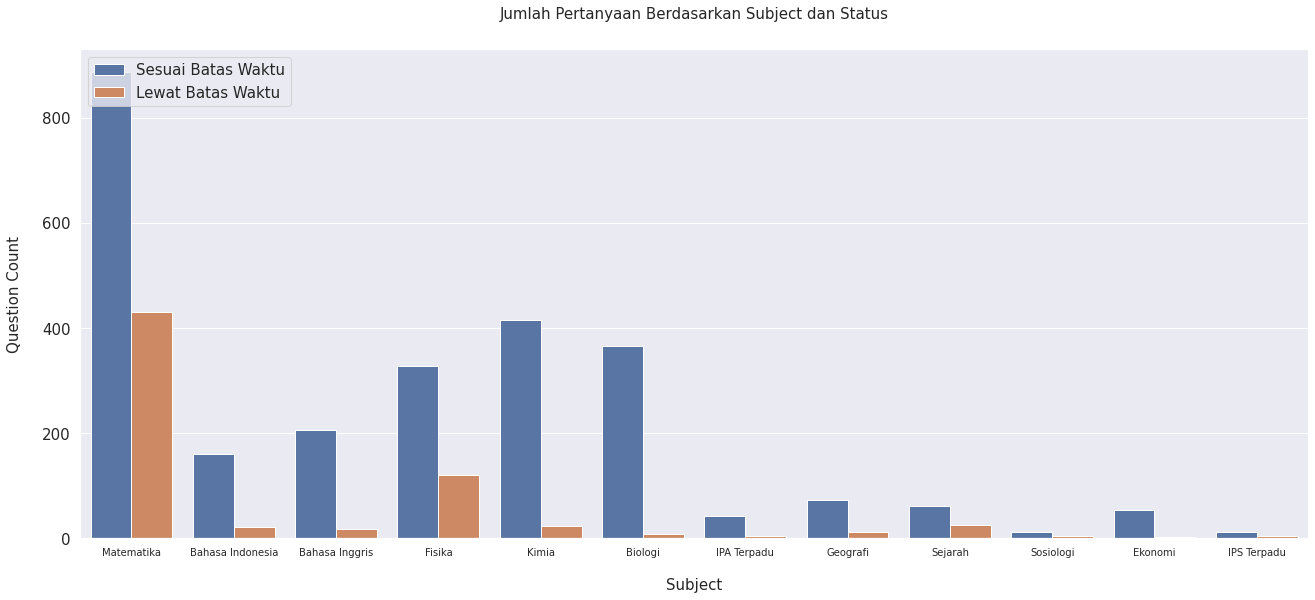

In [26]:
#Mengurutkan Data Sesuai Urutan Subject
Subject_Cat = ['Matematika', 'Bahasa Indonesia', 'Bahasa Inggris',
               'Fisika', 'Kimia', 'Biologi', 'IPA Terpadu',
               'Geografi', 'Sejarah', 'Sosiologi', 'Ekonomi', 'IPS Terpadu']
df['Subject'] = pd.Categorical(df['Subject'], categories=Subject_Cat, ordered=True)

#Create Bar Chart
plot_grafik_batang('Subject','Status',df)

## **Mengukur Performa Kecepatan Respon Terhadap Pertanyaan yang Dibuat**

Pada grafik Pie Chart, menunjukkan bahwa sebenarnya tingkat respon dari tiap pertanyaan cukup bervariasi dan seimbang secara keseluruhan. Dengan kata lain, perlu ditingkatkan lagi dalam hal kecepatan respons karena pertanyaan dengan respon 'Lambat' itu sebesar 27.5%. Paling tidak, harus menguranginya hingga menjadi kurang dari 20% dan tidak ada pertanyaan dengan respon 'Sangat Lambat' untuk selanjutnya

Jumlah pertanyaan berdasarkan tingkat kecepatan respon:
 Lambat           902
Sangat Cepat     862
Cepat            806
Sedang           614
Sangat Lambat    101
Name: Respond Rate, dtype: int64 



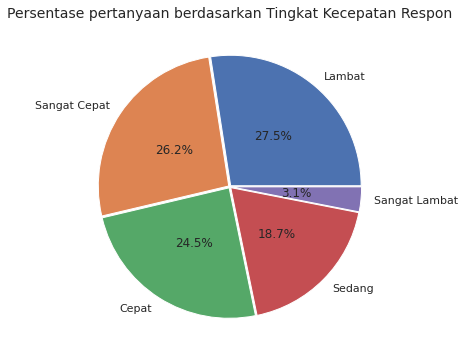

In [27]:
#Mengurutkan Data Sesuai Urutan Day Of Week
RespondRate_Cat = ['Sangat Cepat','Cepat','Sedang','Lambat','Sangat Lambat']
df['Respond Rate'] = pd.Categorical(df['Respond Rate'], categories=RespondRate_Cat, ordered=True)

#Menghitung jumlah pertanyaan berdasarkan Respond Rate
respond_data = df['Respond Rate'].value_counts()
print('Jumlah pertanyaan berdasarkan tingkat kecepatan respon:\n', respond_data, '\n')

#Create pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = respond_data.keys()
plt.pie(x=respond_data, autopct="%.1f%%", explode=[0.01]*5, labels=labels, pctdistance=0.5)
plt.title("Persentase pertanyaan berdasarkan Tingkat Kecepatan Respon", fontsize=14);
pie.savefig("Persentase pertanyaan berdasarkan Tingkat Kecepatan Respon.png")

Kolom **`Respond Rate`**, menjelaskan tingkat kecepatan teacher dalam merespon pertanyaan. Kategorinya antara lain sebagai berikut 
- **Sangat Cepat** (Kurang dari 1 jam)
- **Cepat** (1 - 10 jam)
- **Sedang** (10 - 24 jam)
- **Lambat** (24 - 71 jam)
- **Sangat Lambat** (Lebih dari 71 jam)

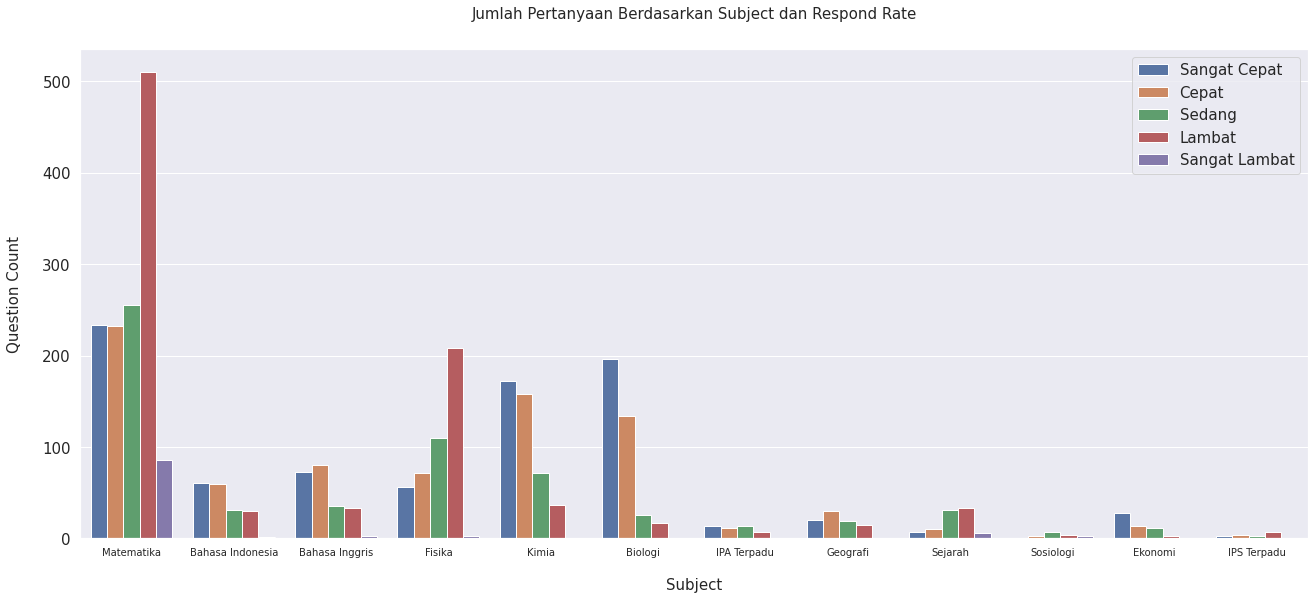

In [28]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Subject', hue='Respond Rate', data=df)
  
plt.xlabel('Subject', size=15, labelpad=20)
plt.ylabel('Question Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
  
plt.legend(['Sangat Cepat','Cepat','Sedang','Lambat','Sangat Lambat'], loc='upper right', prop={'size': 15})
plt.title('Jumlah Pertanyaan Berdasarkan {} dan {}'.format('Subject', 'Respond Rate'), size=15, y=1.05)
plt.savefig("Jumlah Pertanyaan Berdasarkan {} dan {}.png".format('Subject', 'Respond Rate'))
  
plt.show()

Berdasarkan Data Grafik diatas, matematika dan Fisika lah yang paling perlu ditindaklanjuti karena performa respon pertanyaannnya yang cukup lambat relatif mata pelajaran lain. Terlebih untuk pertanyaan matematika ternyata cukup banyak pertanyaan yang direspons lebih dari 3 hari. Sedangkan untuk Fisika pertanyaan banyak direspons lebih dari 1 hari. Untuk Kimia dan Biologi menunjukkan performa yang cukup bagus dalam kecepatan respons pertanyaan. 

## **Apakah ada hari tertentu yang sebaiknya kita menambah jumlah teacher yang bertugas?**

Berikut menampilkan grafik garis yang menunjukkan rata-rata jumlah pertanyaan yang dibuat per-harinya, yang dihitung berdasarkan mingguan. Ditunjukkan bahwa pada hari Rabu hingga Jumat jumlah pertanyaan yang dibuat relatif lebih banyak dibandingkan hari lainnya. Hari dengan jumlah terbanyak merupakan hari Kamis dengan sekitar rata-rata 350 pertanyaan hanya pada hari tersebut. Berdasarkan hal tersebut, saya merekomendasikan untuk **teacher lebih banyak bertugas pada hari Rabu, Kamis, dan Jumat**.

In [29]:
#Menghitung Jumlah Pertanyaan Berdasarkan Day Of Week dan Week Number
gaq = df['Question Created At'].value_counts()
daily_summary = gaq.resample('D').sum()
daily_summary = pd.DataFrame(daily_summary).reset_index()

daily_summary['index'] = pd.to_datetime(daily_summary['index'])
daily_summary['Week Number'] = daily_summary['index'].dt.week #'Week Number' column
daily_summary['Day Of Week'] = daily_summary['index'].dt.day_name() #'Day Of Week' column
daily_summary = daily_summary.set_index(['index']).reset_index(drop=True)
daily_summary = daily_summary.set_index(['Week Number','Day Of Week'])

# Delete row with index label '31' in Week Number Column
daily_summary = daily_summary.drop(31) #drop row dengan Week Number 31 untuk penyesuaian niai mean

daily_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


Question Created At
Week Number Day Of Week                     
29          Monday                       161
            Tuesday                       67
            Wednesday                    191
            Thursday                     253
            Friday                       253
            Saturday                     123
            Sunday                       110
30          Monday                       337
            Tuesday                      396
            Wednesday                    334
            Thursday                     413
            Friday                       291
            Saturday                     167
            Sunday                       144

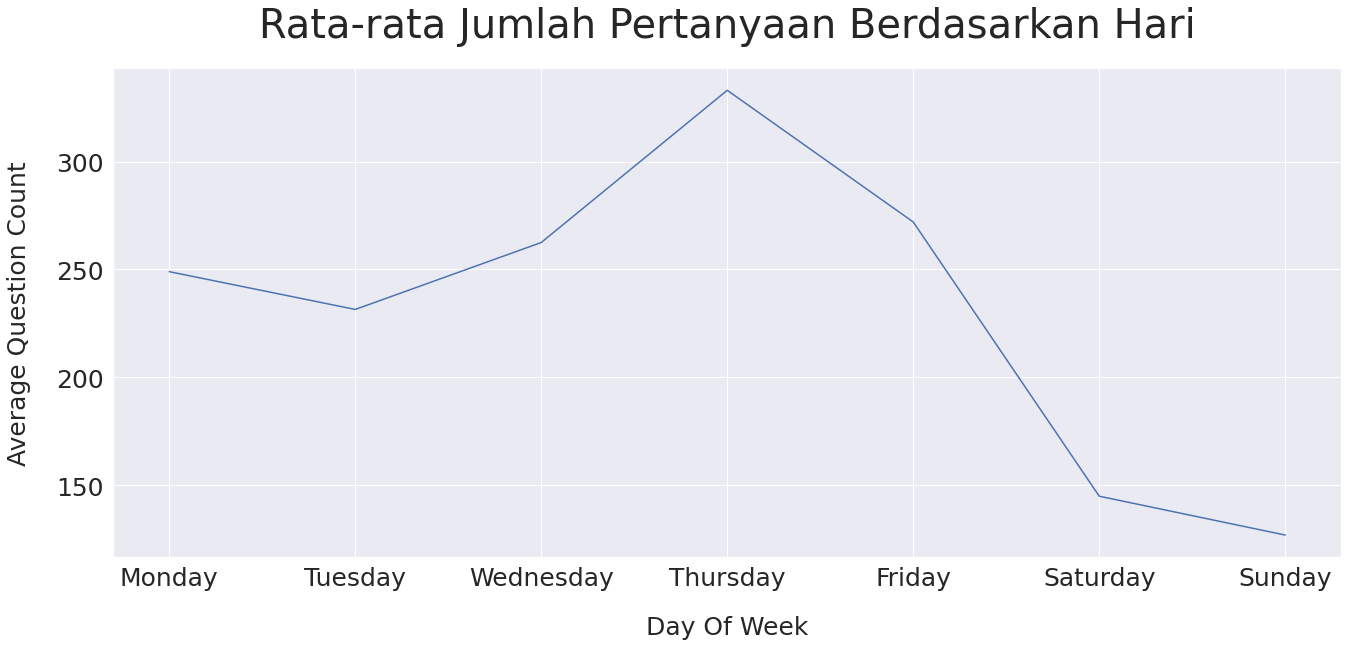

In [42]:
daily_summary_agg = daily_summary.groupby('Day Of Week').mean().reset_index()

#Mengurutkan Data Sesuai Urutan Day Of Week
DayOfWeek_Cat = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_summary_agg['Day Of Week'] = pd.Categorical(daily_summary_agg['Day Of Week'], 
                                                  categories=DayOfWeek_Cat, ordered=True)

# draw lineplot
fig, axs = plt.subplots(figsize=(22, 9))
sns.lineplot(x="Day Of Week", y="Question Created At", data=daily_summary_agg)

plt.xlabel('Day Of Week', size=25, labelpad=25)
plt.ylabel('Average Question Count', size=25, labelpad=25)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
  
plt.title('Rata-rata Jumlah Pertanyaan Berdasarkan Hari', size=40, y=1.05)
plt.savefig("Rata-rata Jumlah Pertanyaan Berdasarkan Hari.png")
  
plt.show()

## **Rata-rata, berapa postingan yang dibuat per siswa tiap minggunya?**

Data dimulai dari minggu ke-29 hingga awal minggu ke 31. Berikut merupakan tabel yang menunjukkan rata-rata pertanyaan dibuat pada minggu ke-29, minggu ke-30, dan minggu ke-31
- Pada minggu ke 29, setiap siswa atau member membuat 2 pertanyaan per minggu
- Pada minggu ke-30, setiap siswa atau member juga membuat 2 pertanyaan per minggu
- Pada minggu ke-31, karena datanya tidak terlalu lengkap. Maka relatif sangat sedikit hanya 1 pertanyaan per siswa. 

Kemudian jika kita lihat bagaimana persebaran datanya, sebenarnya hampir kebanyakan siswa bertanya 1-2 pertanyaan saja. Namun memang ada sedikit siswa yang bertanya lebih dari 2 bahkan hingga 60 pertanyaan per minggu. Dengan demikian, maka **member atau siswa rata-rata membuat postingan pertanyaan sebanyak 2 pertanyaan per minggunya.**

In [31]:
question_data = df[['Email','Week Number']]

question_per_member = pd.DataFrame(question_data.value_counts()).reset_index()

sum_question_per_member = question_per_member.groupby(['Email','Week Number']).sum().rename(columns = {0 : "Sum"})
average_question_per_member = sum_question_per_member.groupby(['Week Number']).mean().rename(columns = {"Sum" : "Average"})

print(sum_question_per_member.describe())
average_question_per_member

               Sum
count  1589.000000
mean      2.067338
std       2.480122
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      60.000000


,Average
Week Number,
29,2.071556
30,2.096677
31,1.216216


## **Pada jam berapa saja sebaiknya teacher banyak bertugas?**

Saya membagi jam-jam tertentu menjadi 8 kategori. Pembagian kisaaran jam untuk setiap 3 jam. Berdasarkan grafik dibawah, rata-rata jumlah pertanyaan cukup banyak muncul atau dibuat pada kisaran jam 09:00 - 21:00 dengan jumlah lebih dari 75 pertanyaan. Namun jumlah yang paling banyak itu ada di kisaran jam 09:00 - 11:59 dengan jumlah sekitar 90 pertanyaan. Dengan demikian, teacher sebaiknya banyak bertugas antara jam 09:00 hingga jam 11:59 (yang paling utama), dan juga bertugas hingga jam 21:00. 

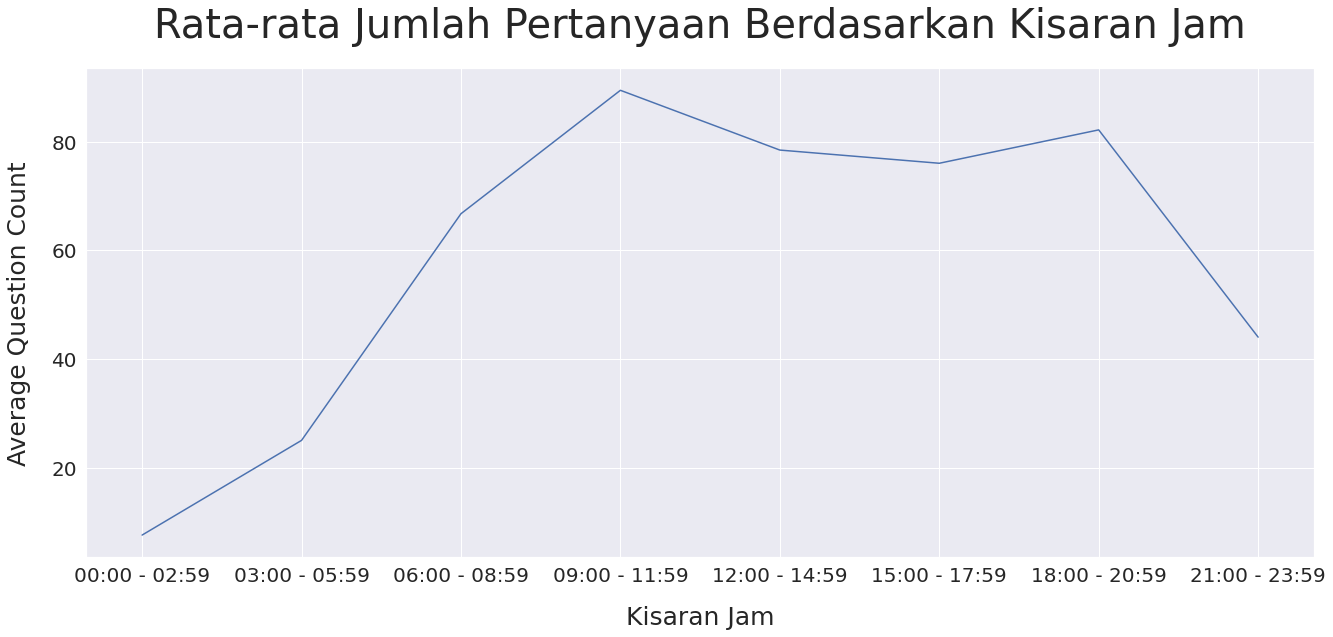

In [44]:
waktu_shift_data = pd.DataFrame(df[['Question Answered At','Day Of Week']])

# define the bins
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]

# add custom labels
labels = ['00:00 - 02:59', '03:00 - 05:59', 
          '06:00 - 08:59', '09:00 - 11:59',
          '12:00 - 14:59', '15:00 - 17:59',
          '18:00 - 20:59', '21:00 - 23:59']

# add the bins to the dataframe
waktu_shift_data['Time Bin'] = pd.cut(waktu_shift_data['Question Answered At'].dt.hour, bins, labels=labels, right=False)
waktu_shift_data['Time Bin'] = pd.Categorical(waktu_shift_data['Time Bin'], categories=labels, ordered=True) #mengurutkan data
waktu_shift_data = waktu_shift_data.set_index(['Question Answered At']).reset_index(drop=True)

#menghitung jumlah pertanyaan dan menghitung rata-ratanya berdasarkan Time Bin
pertanyaan_per_kisaran_jam = pd.DataFrame(waktu_shift_data.value_counts())
pertanyaan_per_kisaran_jam_agg = pertanyaan_per_kisaran_jam.groupby('Time Bin').mean().reset_index()

# draw lineplot
fig, axs = plt.subplots(figsize=(22, 9))
sns.lineplot(x="Time Bin", y=0, data=pertanyaan_per_kisaran_jam_agg)

plt.xlabel('Kisaran Jam', size=25, labelpad=20)
plt.ylabel('Average Question Count', size=25, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
  
plt.title('Rata-rata Jumlah Pertanyaan Berdasarkan Kisaran Jam', size=40, y=1.05)
plt.savefig("Rata-rata Jumlah Pertanyaan Berdasarkan Kisaran Jam.png")
  
plt.show()


# **Export File CSV**

In [37]:
df.to_csv('Data Test Ruang Guru.csv', index=False, sep=',')